In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Exploratory Data Analysis

*Goal*: The superstore needs help with a binary classification task of predicting the likelihood a customer will give a positive response to a new marketing campaign and identifying the different factors which affect the customer's response. I am analyzing the data provided to identify these factors and then build a prediction model to predict the probability a customer will give a positive response (Kaggle Marketing Campaign Prediction).

In [2]:
df = pd.read_csv("superstore_data.csv")

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
#Column descriptions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Income field has missing values
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
#Imbalanced outcome variable
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [7]:
#Summary Statistics
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [8]:
#Separating variables for graphing purposes 
df_num = df[['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']]

df_bar = df[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']]

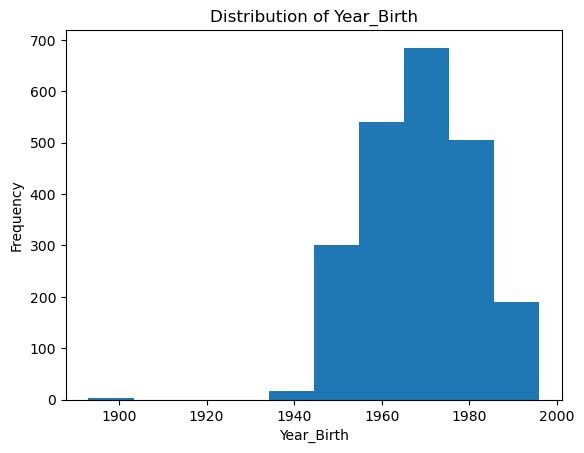

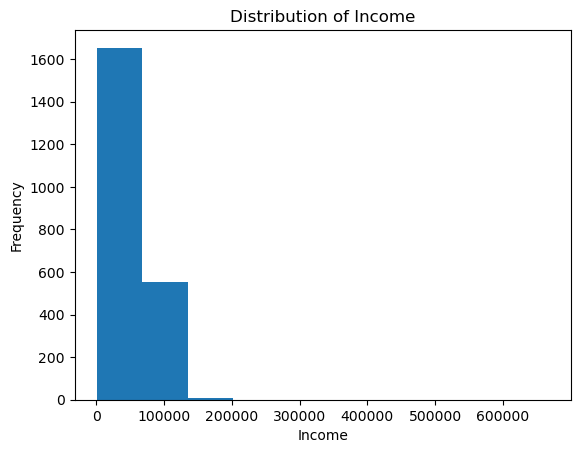

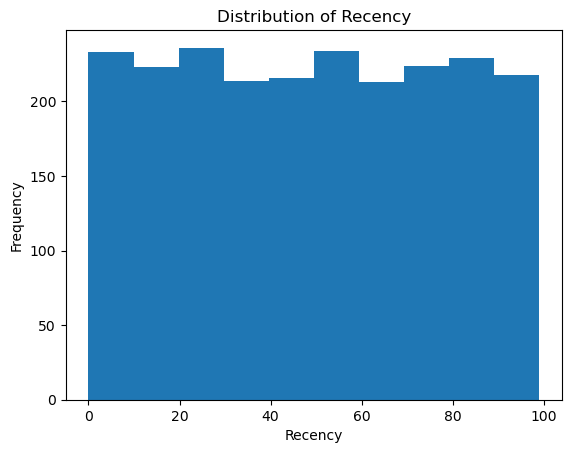

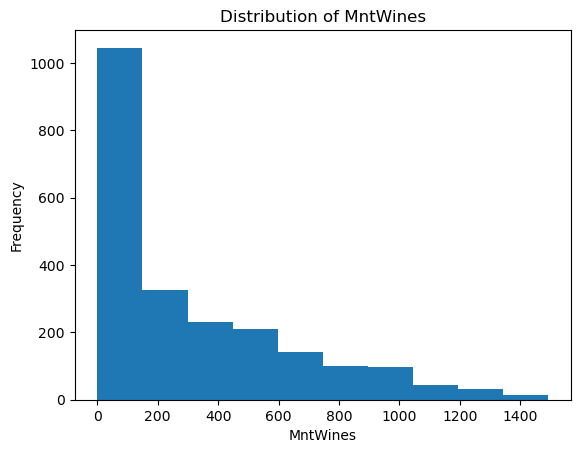

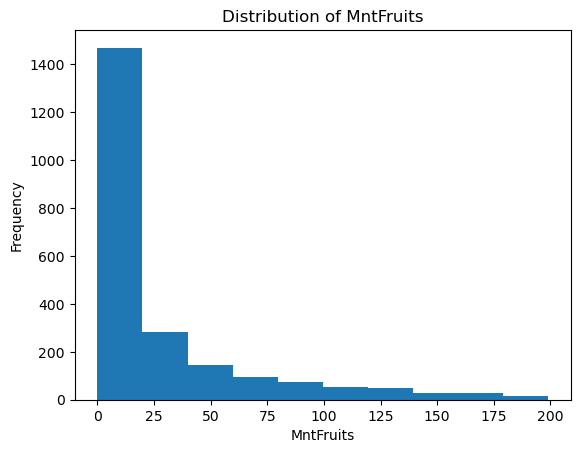

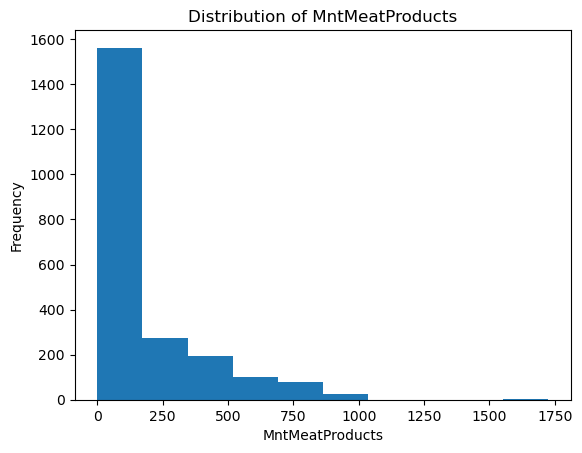

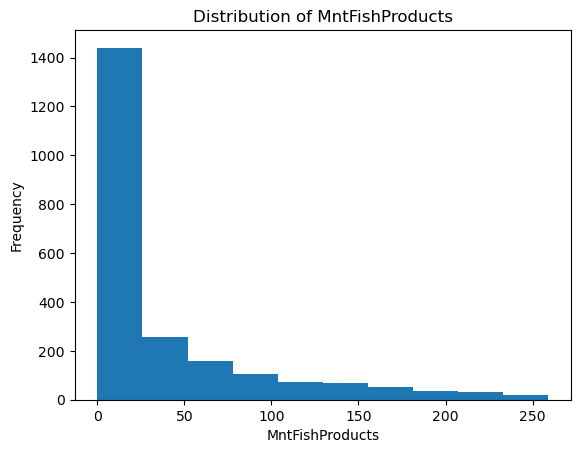

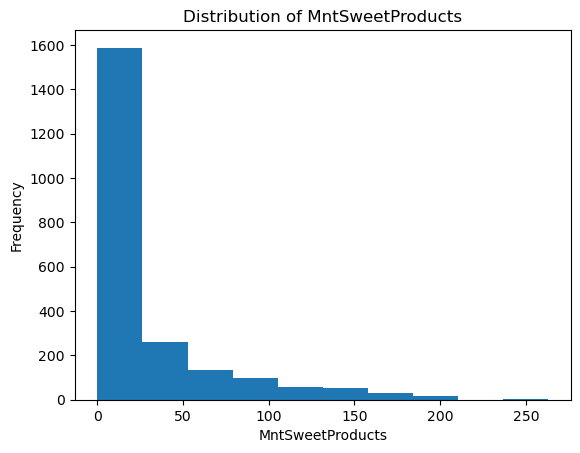

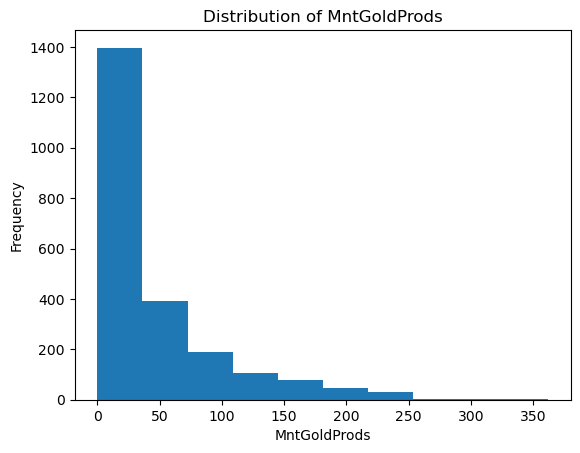

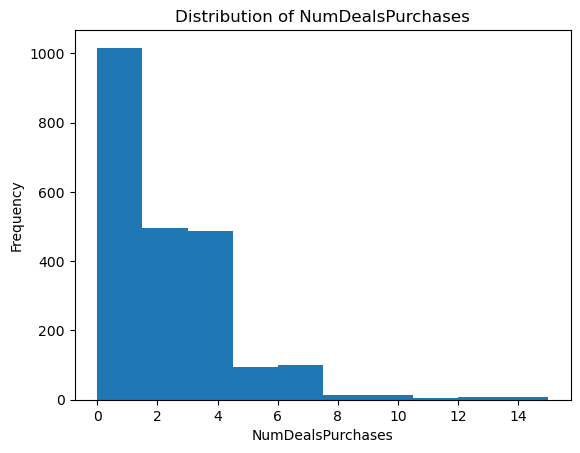

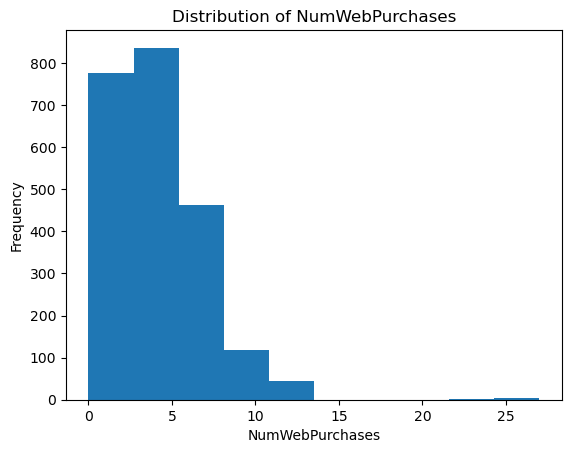

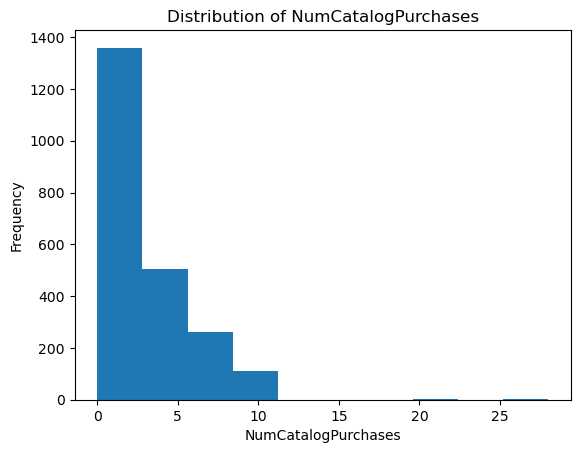

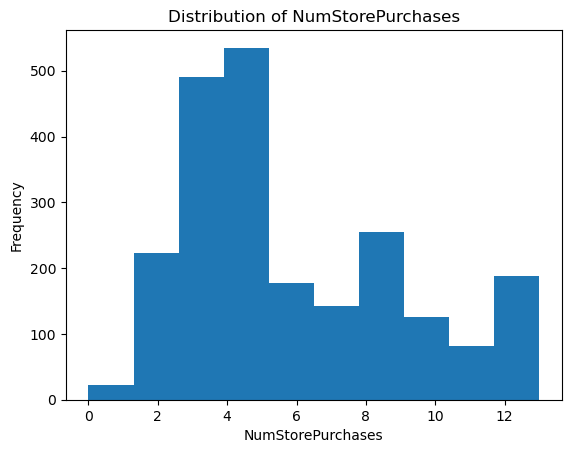

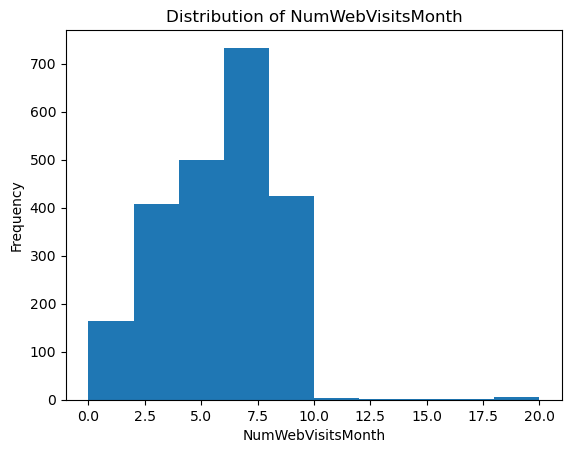

In [9]:
#Many of the distributions appear skewed to the right
for col in df_num.columns.values:
    plt.hist(df_num[col])
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.title("Distribution of " + col)
    plt.show()

In [10]:
#Correlation values between numeric features
df_num.corr()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.161791,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139
Income,-0.161791,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088
Recency,-0.019871,-0.003970,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445
MntWines,-0.157773,0.578650,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653
MntFruits,-0.017917,0.430842,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383
MntMeatProducts,-0.030872,0.584633,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470
MntFishProducts,-0.041625,0.438871,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003
MntSweetProducts,-0.018133,0.440744,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294
MntGoldProds,-0.061818,0.325916,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719
NumDealsPurchases,-0.060846,-0.083101,-0.001098,0.010940,-0.132114,-0.122415,-0.139361,-0.120100,0.049085,1.000000,0.234185,-0.008617,0.068879,0.347633


In [11]:
#Correlations greater than 0.7 between numeric variables
(df_num.corr() > 0.7).apply(lambda x: sum(x))

Year_Birth             1
Income                 1
Recency                1
MntWines               1
MntFruits              1
MntMeatProducts        2
MntFishProducts        1
MntSweetProducts       1
MntGoldProds           1
NumDealsPurchases      1
NumWebPurchases        1
NumCatalogPurchases    2
NumStorePurchases      1
NumWebVisitsMonth      1
dtype: int64

<Axes: >

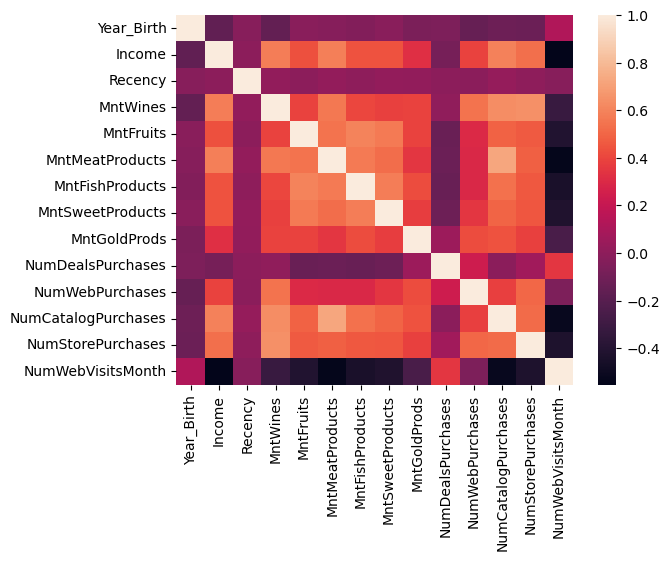

In [12]:
#Correlations between numeric variables in heatmap
sns.heatmap(df_num.corr())

In [13]:
#Averages by Response type
pd.pivot_table(df, index = "Response", values = df_num.columns)

,Income,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Year_Birth
Response,,,,,,,,,,,,,,
0,50839.132767,34.980063,24.216684,40.968520,144.624344,25.035152,269.104407,2.391920,2.323190,5.736621,3.911857,5.320567,51.514690,1968.698846
1,60209.675676,52.050898,38.203593,61.446108,294.353293,38.634731,502.703593,4.203593,2.335329,6.095808,5.071856,5.293413,35.383234,1969.416168


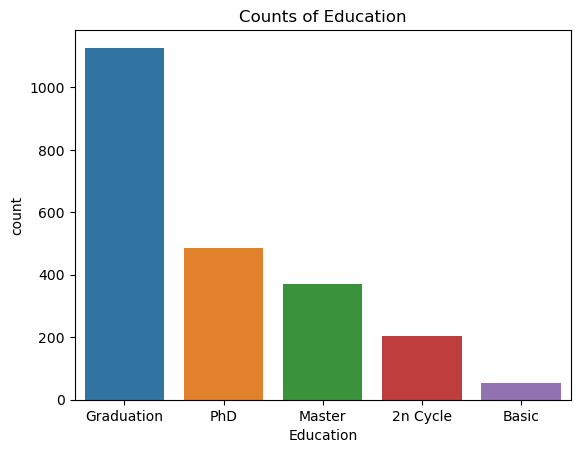

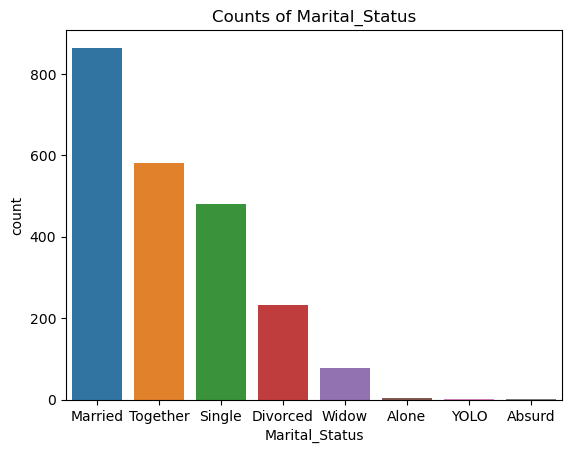

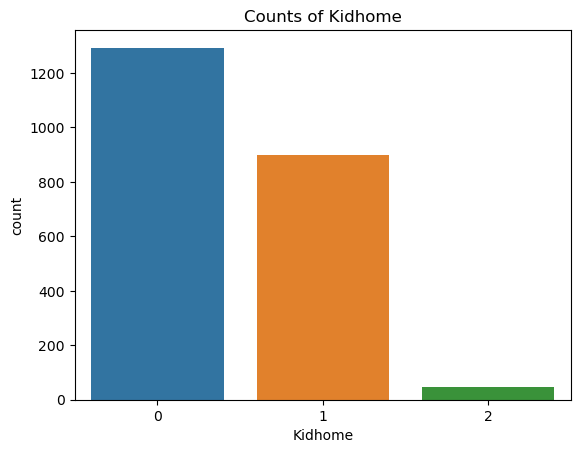

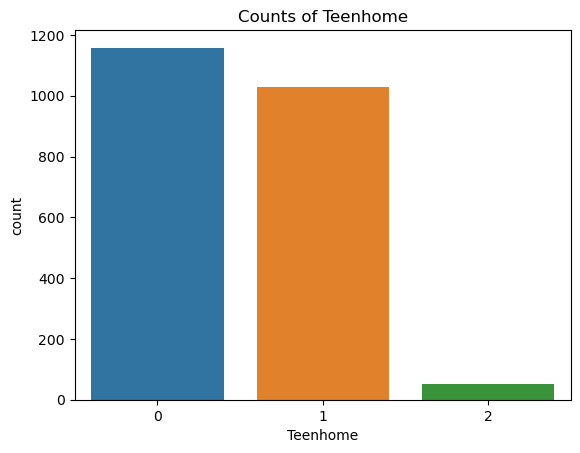

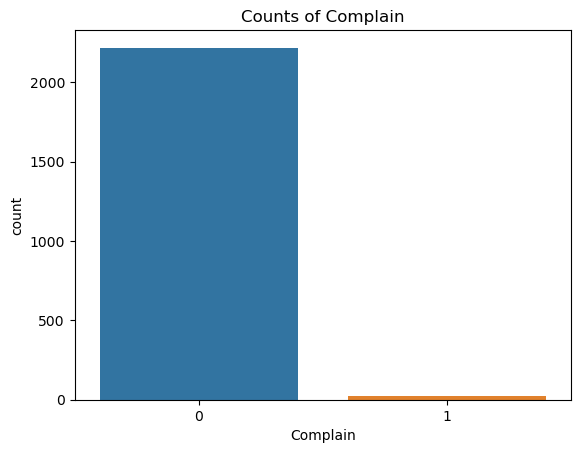

In [14]:
#Create bar graphs for columns in df_bar
for col in df_bar.columns:
    sns.barplot(x = df_bar[col].value_counts().index, y = df_bar[col].value_counts()).set_title("Counts of " + col)
    plt.show()
    

In [15]:
#Overall summary of dataframe
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 2240   │ │ int64       │ 18    │                                    │
│ │ Number of columns │ 22     │ │ string      │ 3     │                                    │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃           ┃        ┃       ┃      ┃       ┃       ┃        ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA %      ┃ mean   ┃ sd    ┃ p0   ┃ p25   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id        │  0 │         0 │   5600 │  3200 │    0 │  2800 │  8400 │  11000 │ ▇███▆█ │  │
│ │ Year_Birt │  0 │         0 │   2000 │    12 │ 1900 │  2000 │  2000 │   2000 │    ▅█▃ │  │
│ │ h         │    │           │        │       │      │       │       │        │        │  │
│ │ Income    │ 24 │ 1.0714285 │  52000 │ 25000 │ 1700 │ 35000 │ 69000 │ 670000 │   █    │  │
│ │           │    │ 714285714 │        │       │      │       │       │        │        │  │
│ │ Kidhome   │  0 │         0 │   0.44 │  0.54 │    0 │     0 │     1 │      2 │  █  ▆  │  │
│ │ Teenhome  │  0 │         0 │   0.51 │  0.54 │    0 │     0 │     1 │      2 │  █  ▇  │  │
│ │ Recency   │  0 │         0 │     49 │    29 │    0 │    24 │    74 │     99 │ ██▇███ │  │
│ │ MntWines  │  0 │         0 │    300 │   340 │    0 │    24 │   500 │   1500 │ █▂▂▁▁  │  │
│ │ MntFruits │  0 │         0 │     26 │    40 │    0 │     1 │    33 │    200 │  █▁▁   │  │
│ │ MntMeatPr │  0 │         0 │    170 │   230 │    0 │    16 │   230 │   1700 │  █▁▁   │  │
│ │ oducts    │    │           │        │       │      │       │       │        │        │  │
│ │ MntFishPr │  0 │         0 │     38 │    55 │    0 │     3 │    50 │    260 │  █▁▁   │  │
│ │ oducts    │    │           │        │       │      │       │       │        │        │  │
│ │ MntSweetP │  0 │         0 │     27 │    41 │    0 │     1 │    33 │    260 │  █▁▁   │  │
│ │ roducts   │    │           │        │       │      │       │       │        │        │  │
│ │ MntGoldPr │  0 │         0 │     44 │    52 │    0 │     9 │    56 │    360 │  █▁▁   │  │
│ │ ods       │    │           │        │       │      │       │       │        │        │  │
│ │ NumDealsP │  0 │         0 │    2.3 │   1.9 │    0 │     1 │     3 │     15 │  █▃▁   │  │
│ │ urchases  │    │           │        │       │      │       │       │        │        │  │
│ │ NumWebPur │  0 │         0 │    4.1 │   2.8 │    0 │     2 │     6 │     27 │  █▄▁   │  │
│ │ chases    │    │           │        │       │      │       │       │        │        │  │
│ │ NumCatalo │  0 │         0 │    2.7 │   2.9 │    0 │     0 │     4 │     28 │   █▂   │  │
│ │ gPurchase │    │           │        │       │      │       │       │        │        │  │
│ │ s         │    │           │        │       │      │       │       │        │        │  │
│ │ NumStoreP │  0 │         0 │    5.8 │   3.3 │    0 │     3 │     8 │     13 │ ▂█▄▃▂▃ │  │
│ │ urchases  │    │           │        │       │      │       │       │        │        │  │
│ │ NumWebVis │  0 │         0 │    5.3 │   2.4 │    0 │     3 │     7 │     20 │  ▅██   │  │
│ │ itsMonth  │    │           │        │       │   